In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
%matplotlib inline
import kwant

In [112]:
at = 1
bilayer =  kwant.lattice.general([(at*np.sqrt(3)/2, at*1/2), (0, at*1)],
                                 [(0, 0.0), (at*1 / (2*np.sqrt(3)), at*1/2), 
                                  (-at*1/(2*np.sqrt(3)), at*1/2), (0, 0)])
a1, b1, a2, b2 = bilayer.sublattices


def make_bilayer_system(r=2):
    def circle(pos):
        x, y = pos
        return x ** 2 + y ** 2 < r ** 2

    syst = kwant.Builder()

    def onsite(site):
        return t

    syst[bilayer.shape(circle, (0, 0))] = onsite
    hoppings1 = (((0, 0), a1, b1), ((0, 1), a1, b1), ((1, 0), a1, b1)) 
    hoppings2 = (((0, 0), a2, b2), ((0, -1), a2, b2), ((1, -1), a2, b2))
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings1]] = -1    
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2]] = -1   
    #syst = syst.finalized()
    return(syst)

In [113]:
bilayer_syst = make_bilayer_system()

In [130]:
site_shapes = {a1: 'o', b1:'o', a2: 's', b2: 's',}
def bilayer_shapes(site):
    return site_shapes[site.family]
bilayer_dict = {a1: np.asarray([68, 1, 84])/255, b1: np.asarray([51, 99, 141])/255, 
                  a2: np.asarray([68, 1, 84])/255, b2: np.asarray([51, 99, 141])/255}
def bilayer_colors(site):
    return bilayer_dict[site.family]

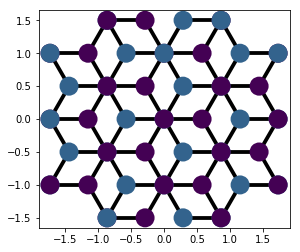

In [131]:
fig2 = kwant.plot(bilayer_syst, site_color=bilayer_colors)

In [132]:
graphene = kwant.lattice.honeycomb(a=1)
a, b = graphene.sublattices
t = 1

In [133]:
def make_system(r=2):
    def circle(pos):
        x, y = pos
        return x ** 2 + y ** 2 < r ** 2

    syst = kwant.Builder()

    def onsite(site):
        return t

    syst[graphene.shape(circle, (0, 0))] = onsite
    hoppings = (((0, 0), a, b), ((0, 1), a, b), ((-1, 1), a, b))
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -1    
    #syst = syst.finalized()
    return(syst)

In [134]:
colors_dict = {a: np.asarray([68, 1, 84])/255, b: np.asarray([51, 99, 141])/255}
def family_color(site):
    return colors_dict[site.family]
#def family_colors(site):
#    return 0 if site.family == a else 1

In [135]:
system = make_system()


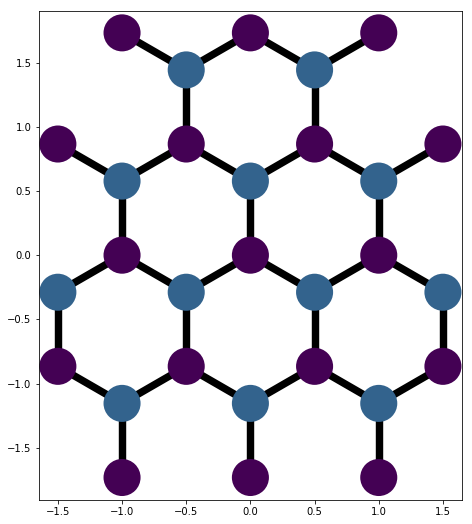

In [136]:
fig = kwant.plotter.plot(system, fig_size=(16,9), site_color=family_color, site_edgecolor='black')
fig.savefig('graphene-new.svg')

In [2]:
cmap = ["#440154ff", "#440558ff", "#450a5cff", "#450e60ff", "#451465ff", "#461969ff",
 "#461d6dff", "#462372ff", "#472775ff", "#472c7aff", "#46307cff", "#45337dff",
 "#433880ff", "#423c81ff", "#404184ff", "#3f4686ff", "#3d4a88ff", "#3c4f8aff", 
 "#3b518bff", "#39558bff", "#37598cff", "#365c8cff", "#34608cff", "#33638dff",
 "#31678dff", "#2f6b8dff", "#2d6e8eff", "#2c718eff", "#2b748eff", "#29788eff",
 "#287c8eff", "#277f8eff", "#25848dff", "#24878dff", "#238b8dff", "#218f8dff",
 "#21918dff", "#22958bff", "#23988aff", "#239b89ff", "#249f87ff", "#25a186ff",
 "#25a584ff", "#26a883ff", "#27ab82ff", "#29ae80ff", "#2eb17dff", "#35b479ff",
 "#3cb875ff", "#42bb72ff", "#49be6eff", "#4ec16bff", "#55c467ff", "#5cc863ff",
 "#61c960ff", "#6bcc5aff", "#72ce55ff", "#7cd04fff", "#85d349ff", "#8dd544ff",
 "#97d73eff", "#9ed93aff", "#a8db34ff", "#b0dd31ff", "#b8de30ff", "#c3df2eff",
 "#cbe02dff", "#d6e22bff", "#e1e329ff", "#eae428ff", "#f5e626ff", "#fde725ff"]

In [3]:
qpcdata = '/home/nefta/thesis/results/IQPCdata.dat'

In [5]:
import pandas as pd

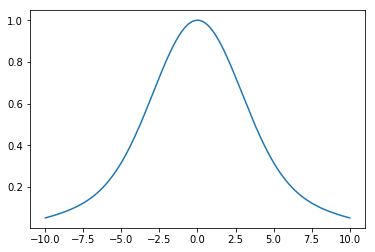

In [18]:
qpcdata = pd.read_csv(qpcdata, header=None)[0].values
fig, ax = plt.subplots()
flux = np.arange(-10, 10.01, 0.1)
ax.plot(flux, qpcdata)

###  Plot current in different limits of $\phi$

In [8]:
from math import sqrt, exp, log, atan, pi

In [17]:
def parabolic(x, phi):
    fzero = sqrt(x**2 + 1) * log(sqrt(x**2 + 1) + x) / x**3 - 2 / (x * (x + (x**2 + 1) * atan(x)))
    return 1  - 9 * pi**2 * phi**2 * fzero / 32

In [26]:
xvalues = [ 3 / l for l in np.arange(1, 8)]

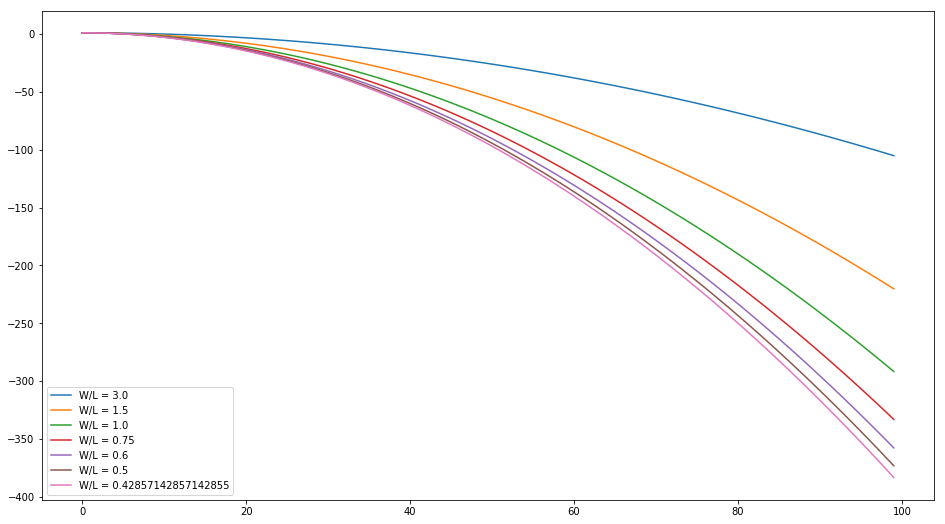

In [27]:
fig, ax = plt.subplots(figsize=(16,9))
for x in xvalues:
    result = [parabolic(x, phival) for phival in np.linspace(0,15, 100)]
    ax.plot(result, label='W/L = {}'.format(x))
ax.legend()

In [33]:
def exp_limit(x, phi):
    f1 = exp(- 3 * pi * phi / (2 * x))
    f2 = sqrt(3 * phi / (2 * x))
    f3 = (1 + 3 * pi * phi / (4 * x))
    f4 = pi**2 * (1 + x**2)**(3/2) / (4 * x * (x + (1 + x**2) * atan(x)))
    return f1 * f2 * f3 * f4

In [45]:
def exp_limit_2(x, phi):
    f1 = exp(- pi * phi / (2 * x))
    f2 = (phi * pi / (2 * x))**(3/2)
    f3 = (1 + x**2)**(3/2) / (x + (1 + x**2) * atan(x))
    f4 = pi**(3/2) / (8 * x**2)
    return f1 * f2 *f3 *f4

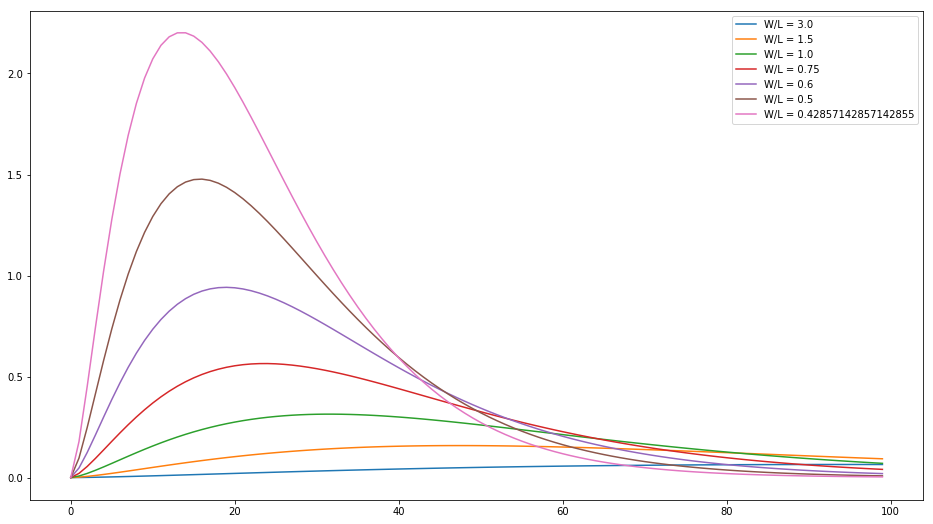

In [47]:
fig, ax = plt.subplots(figsize=(16,9))
for x in xvalues:
    result = [exp_limit_2(x, phival for phival in np.linspace(0,3, 100)]
    ax.plot(result, label='W/L = {}'.format(x))
ax.legend()

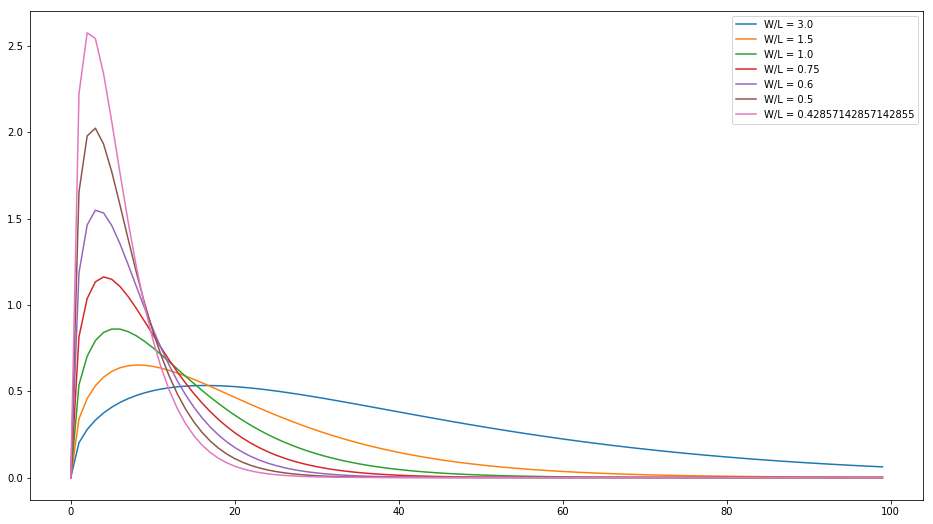

In [35]:
fig, ax = plt.subplots(figsize=(16,9))
for x in xvalues:
    result = [exp_limit(x, phival) for phival in np.linspace(0,3, 100)]
    ax.plot(result, label='W/L = {}'.format(x))
ax.legend()

In [4]:
def trans(x, flux):
    result = [np.abs(1 + x * np.cos(np.pi * phi) / 2  ) / (1 + x/ 2) for phi in flux]
    return result

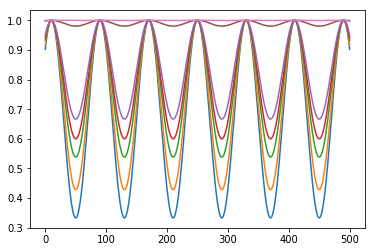

In [7]:
phimax = 6.25
delta_phi = 0.025
flux = np.arange(-phimax, phimax + delta_phi, delta_phi)
fig, ax = plt.subplots()
ax.plot(trans(1, flux))
ax.plot(trans(0.8, flux))
ax.plot(trans(0.6, flux))
ax.plot(trans(0.5, flux))
ax.plot(trans(0.4, flux))
ax.plot(trans(0.02, flux))
ax.plot(trans(0.001, flux))

In [8]:
tq_vals  = np.linspace(0, 1, 10)

In [10]:
import matplotlib as mpl

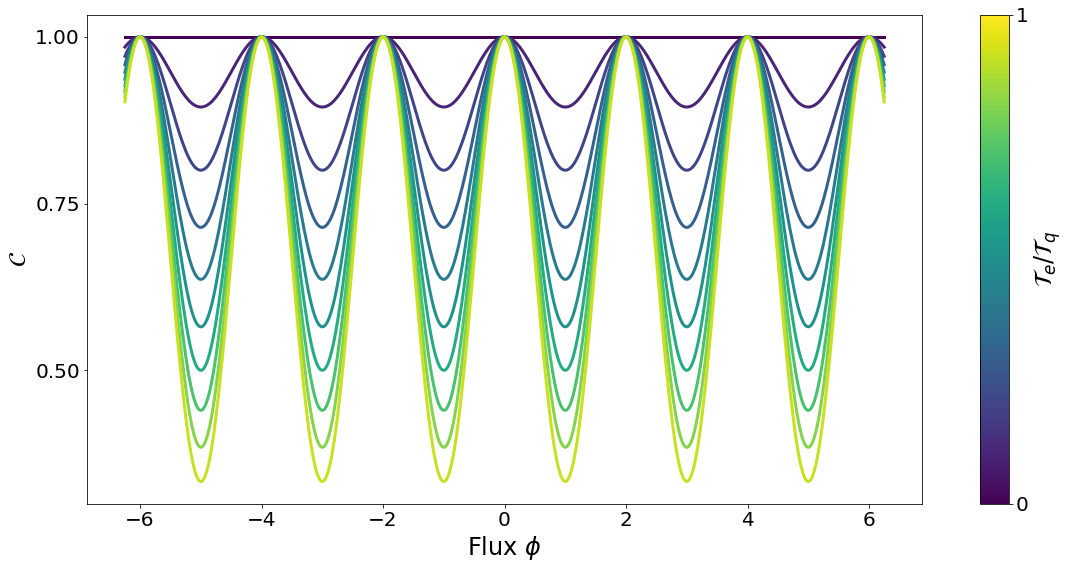

In [13]:
fig, ax = plt.subplots(figsize=(16, 9))
fig.subplots_adjust(right=0.85)

fontlabelsize = 24
ticklabelsize = 20

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cbar_ax = fig.add_axes([0.9, 0.125, 0.025, 0.755])
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical', ticks=[0.0, 1.0], )
cb1.set_label(r'$\mathcal{T}_e/\mathcal{T}_q$', fontsize=fontlabelsize)
cb1.ax.tick_params(labelsize=ticklabelsize)

for index, tq_val in enumerate(tq_vals):
    ax.plot(flux, trans(tq_val, flux), 
            label=r'$\mathcal{{T}}_q/\mathcal{{T}}_e = {}$'.format(round(tq_val,2)), 
            color=cmap(index * round(cmap.N / len(tq_vals))), linewidth=3)

ax.xaxis.set_ticks(np.arange(-round(phimax), round(phimax)+1, 2))
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks([0.5, 0.75, 1])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_xlabel(r'Flux $\phi$', fontsize=fontlabelsize)
ax.set_ylabel(r'$\mathcal{C}$', fontsize=fontlabelsize)

fig.savefig('ratio-transmissions.eps')

In [14]:
def exp_curve(x, a=0.99, b=11):
    return a * np.exp(-x**2 / (2*b))
    

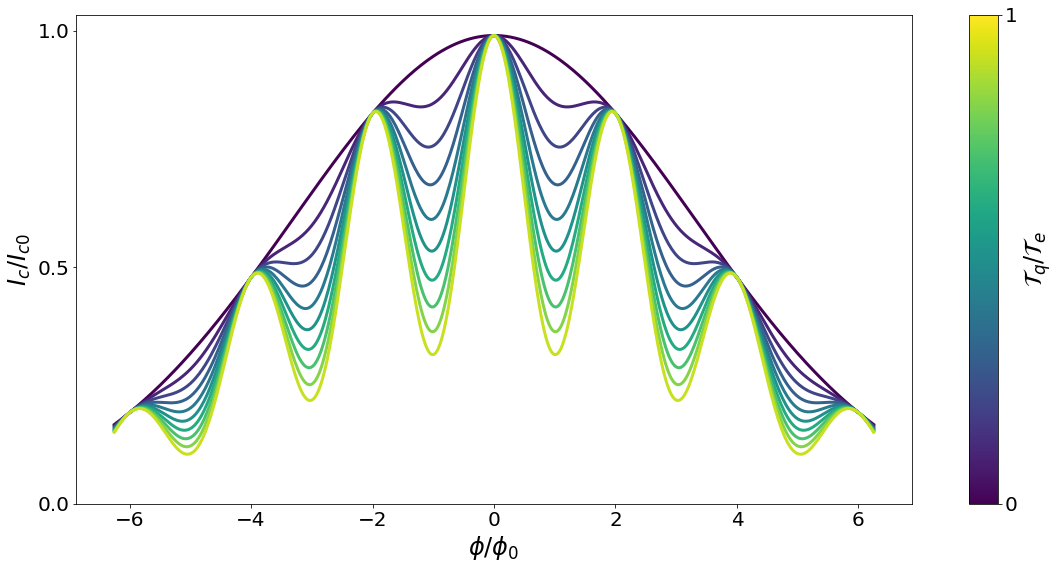

In [17]:
fig, ax = plt.subplots(figsize=(16,9))
fig.subplots_adjust(right=0.85)

fontlabelsize = 24
ticklabelsize = 20

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cbar_ax = fig.add_axes([0.9, 0.125, 0.025, 0.755])
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical', ticks=[0.0, 1.0], )
cb1.set_label(r'$\mathcal{T}_q/\mathcal{T}_e$', fontsize=fontlabelsize)
cb1.ax.tick_params(labelsize=ticklabelsize)
for index, tq_val in enumerate(tq_vals):
    ax.plot(flux,  trans(tq_val, flux)*exp_curve(flux), 
            label=r'$\mathcal{{T}}_e/\mathcal{{T}}_q = {}$'.format(round(tq_val, 2)),
            color=cmap(index * round(cmap.N / len(tq_vals))), linewidth=3)

#ax.legend()
ax.xaxis.set_ticks(np.arange(-round(phimax), round(phimax)+1, 2))
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks([1,0.5, 0])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)
ax.set_ylabel(r'$I_c / I_{c0}$', fontsize=fontlabelsize)
#ax.set_ylabel()
fig.savefig('ratio-transmissions-gaussian.eps')


In [147]:
def energies(e, ef, delta):
    return(np.sqrt((e**2 - ef**2) - delta**2))

In [3]:
def func(x):
    return(np.sqrt(x*(1-1/x)))

/home/nefta/.virtualenvs/kwant/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/nefta/.virtualenvs/kwant/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/home/nefta/.virtualenvs/kwant/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


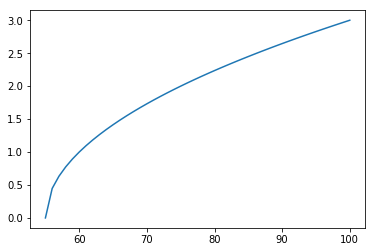

In [4]:
plt.plot(func(np.linspace(-10, 10, 101)))

In [7]:
import matplotlib as mpl
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)
#cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
#                                norm=norm,
#                                orientation='horizontal')
#cb1.set_label('Some Units')

In [4]:
x = np.linspace(0, 1, 100)
def f(x, a):
    return(np.exp(a*x))

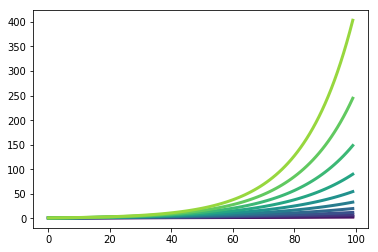

In [5]:
fig, ax = plt.subplots()
for index, a in enumerate([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]):
    ax.plot(f(x, a), linewidth=3, color=cmap[index*6])

In [3]:
def short_j(x, t):
    return(t * np.sin(x) / np.sqrt(1 - t * np.sin(x / 2)**2))

def long(x, t):
    k = np.arange(1, 10000)
    sum_k = [np.sum((-1)**(k + 1) * np.sin(k * xvalue) / k) for xvalue in x]
    return(t * np.asarray(sum_k))
    

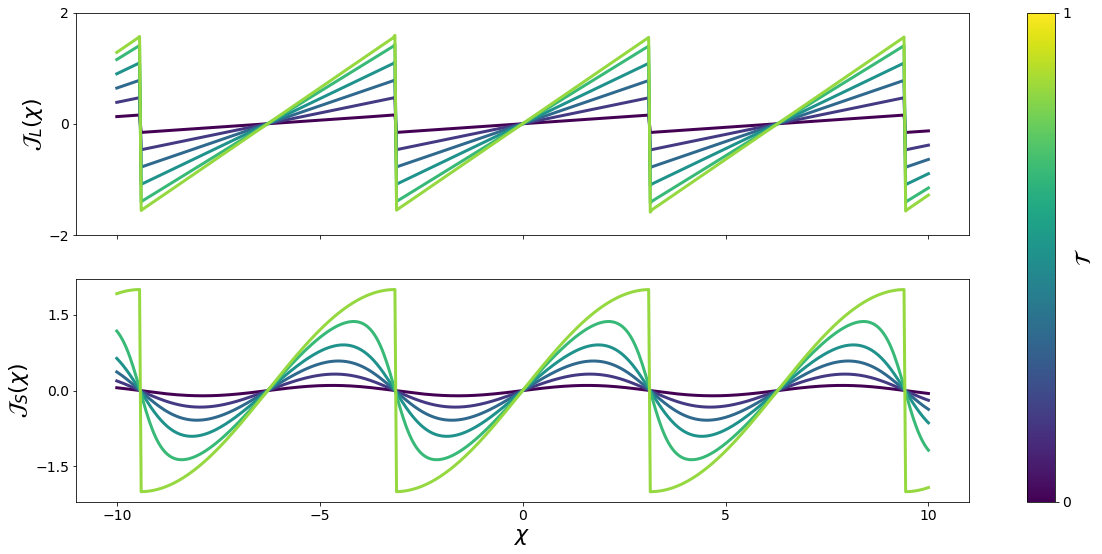

In [89]:
import matplotlib as mpl

x = np.linspace(-10, 10, 500)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(16, 9))
t_vals = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
for index, t in enumerate(t_vals):
    ax1.plot(x, long(x, t), label='t = {}'.format(t), 
        color=cmap(index * round(cmap.N / len(t_vals))), linewidth=3)
    ax2.plot(x, short_j(x, t), label='t = {}'.format(t), 
        color=cmap(index * round(cmap.N / len(t_vals))), linewidth=3)

#ax1.legend(loc=9, prop={'size': 14})
ax2.set_xlabel(r'$\chi$', fontsize=22)
ax1.set_ylabel(r'$\mathcal{J}_L(\chi)$', fontsize=22)
ax2.set_ylabel(r'$\mathcal{J}_S(\chi)$', fontsize=22)
ax2.xaxis.set_ticks([-10, -5, 0, 5, 10])
ax2.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_ticks([2, 0, -2])
ax1.yaxis.set_tick_params(labelsize=14)
ax2.yaxis.set_ticks([1.5, 0, -1.5])
ax2.yaxis.set_tick_params(labelsize=14)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.125, 0.025, 0.755])

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical', ticks=[0.0, 1.0], )
#cb1.set_label(r'Transmission coefficient $\mathcal{T}$', fontsize=22)
cb1.set_label(r'$\mathcal{T}$', fontsize=22)
cb1.ax.tick_params(labelsize=14)
fig.savefig('/home/nefta/thesis/Masterthesis/figure/analyticalmodel/current_density_all.eps')

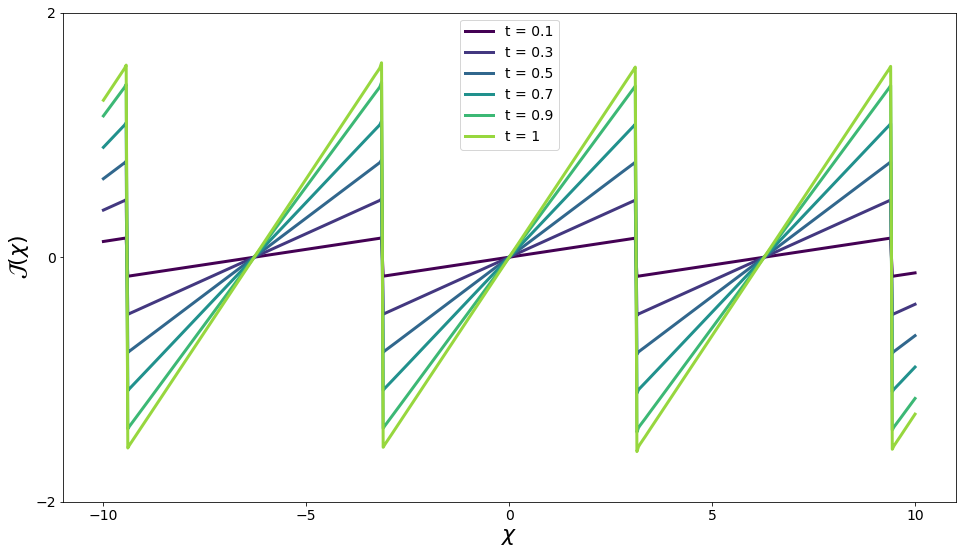

In [127]:
x = np.linspace(-10, 10, 500)
fig, ax = plt.subplots(figsize=(16, 9))
t_vals = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
for index, t in enumerate(t_vals):
    ax.plot(x, long(x, t), label='t = {}'.format(t), 
            color=cmap[index * round(len(cmap) / len(t_vals))], linewidth=3)
ax.legend(loc=9, prop={'size': 14})
ax.set_xlabel(r'$\chi$', fontsize=22)
ax.set_ylabel(r'$\mathcal{J}(\chi)$', fontsize=22)
ax.xaxis.set_ticks([-10, -5, 0, 5, 10])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_ticks([2, 0, -2])
ax.yaxis.set_tick_params(labelsize=14)

fig.savefig('/home/nefta/thesis/Masterthesis/figure/analyticalmodel/current_density_long.pdf')

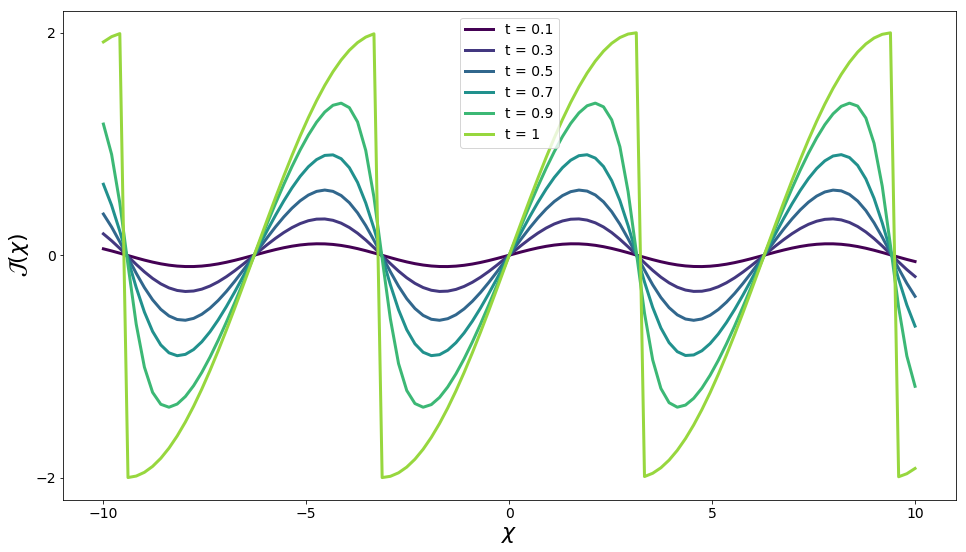

In [126]:
x = np.linspace(-10, 10, 100)
fig, ax = plt.subplots(figsize=(16, 9))
t_vals = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
#for index, t in enumerate(reversed(t_vals)):
for index, t in enumerate(t_vals):
    ax.plot(x, short_j(x, t), label='t = {}'.format(t), 
            color=cmap[index * round(len(cmap) / len(t_vals))], linewidth=3)
ax.legend(loc=9, prop={'size': 14})
ax.set_xlabel(r'$\chi$', fontsize=22)
ax.set_ylabel(r'$\mathcal{J}(\chi)$', fontsize=22)
ax.xaxis.set_ticks([-10, -5, 0, 5, 10])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_ticks([2, 0, -2])
ax.yaxis.set_tick_params(labelsize=14)

fig.savefig('/home/nefta/thesis/Masterthesis/figure/analyticalmodel/current_density_short.pdf')

In [2]:
def readValues(filename):
    values = []
    with open(filename) as csvfile:
        next(csvfile) #skip header
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            values = [float(element) for element in row]
    return(values)

In [3]:
def readValues_modified(filename):
    values = []
    with open(filename) as csvfile:
        next(csvfile) #skip header
        reader = csv.reader(csvfile, delimiter=' ')
        for element in reader:
            values.append(float(element[0]))
    return(values)

In [4]:
def get_dirs_list(directory):
    subdirs = next(os.walk(directory))[1]
    dirs = []
    for subdir in subdirs:
        vsg = subdir[4:-18]
        dirs.append((vsg, directory + subdir + '/data.csv'))
    return(sorted(dirs))

In [5]:
def get_dirs(directory):
    subdirs = next(os.walk(directory))[1]
    for subdir in subdirs:
        vsg = subdir[4:-18]
        yield((vsg, directory + subdir + '/data.csv'))

In [3]:
import pandas as pd

In [6]:
data = pd.read_csv('/home/nefta/thesis/results/zigzagedge/qpc/supercurrent/vsg=-0.04-20180123-13:12:57/data.csv', delimiter=' ', header=None)

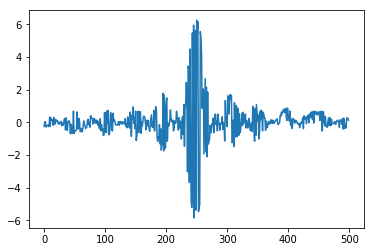

In [11]:
plt.plot(data[1])

In [5]:
data = pd.read_csv('/home/nefta/thesis/results/wg3_2/supercurrent_map/vbg=0.8-20171115-15:56:03/data.csv', header=None)

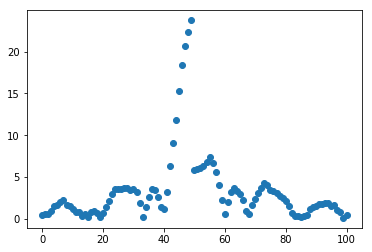

In [11]:
plt.plot(data[400], linestyle='None', marker='o')

In [27]:
data.iloc[1].values

array([ 13.03464288,   2.13646679,   1.74499796,   0.43632354,   0.44564418])

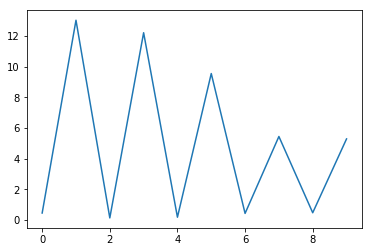

In [23]:
plt.plot(data[0])

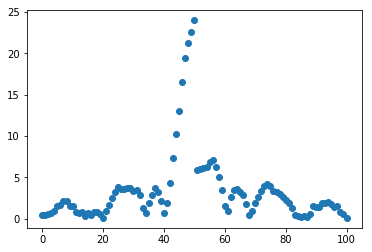

In [21]:
plt.plot(data[100].values, linestyle='None', marker = 'o')

### test plots

In [9]:
readValues('/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.5-20171107-16:03:09/data.csv')

ValueError: could not convert string to float: '0.051125355285,0.051125355285,-3.54789899425e-16'

In [14]:
files = [
    '/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.4-20171016-17:11:50/',
    '/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.4-20171018-14:25:29/',
    '/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.4-20171018-14:46:12/'
]

ValueError: could not convert string to float: '(2.9969358524+5.43721722472e-17j)'

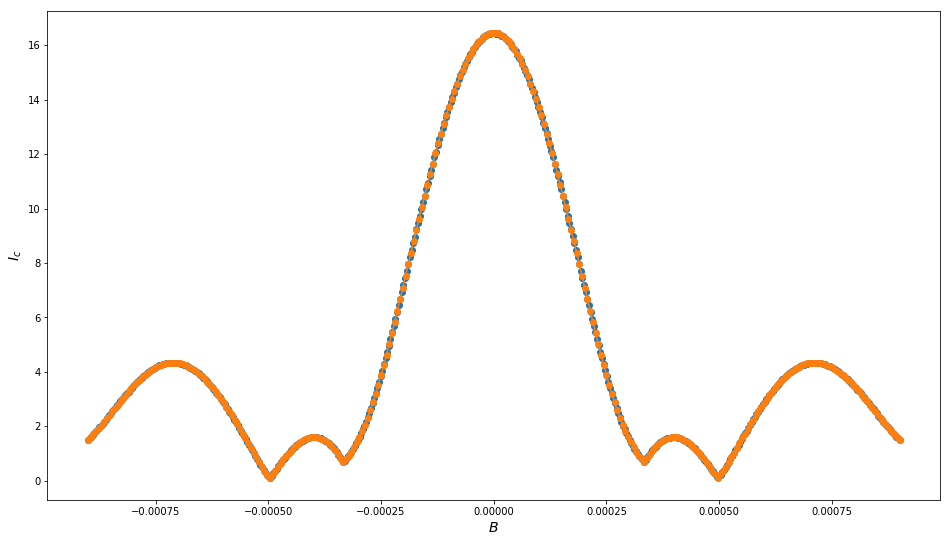

In [16]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel(r'$B$', fontsize=14)
ax.set_ylabel(r'$I_c$', fontsize=14)
maxB = 0.0009
mag_field = np.linspace(-maxB, maxB, 500)
mag_field_short = np.linspace(-maxB, maxB, 300)
ax.plot(mag_field, readValues(files[0] + 'data.csv'), marker='o')
ax.plot(mag_field_short, readValues(files[1] + 'data.csv'), marker='o')
ax.plot(mag_field_short, readValues_modified(files[2] + 'data.csv'), marker='o')
ax.ticklabel_format(style='sci')
ax.legend()
ax.grid()
#fig.savefig('plots/')

# Supercurrent Plots

#### plots for experiment3, short channel

In [29]:
directory = '/home/nefta/thesis/results/wg3_2/supercurrent/'

In [18]:
maxB = 9e-05
mag_field = np.linspace(-maxB, maxB, 500)

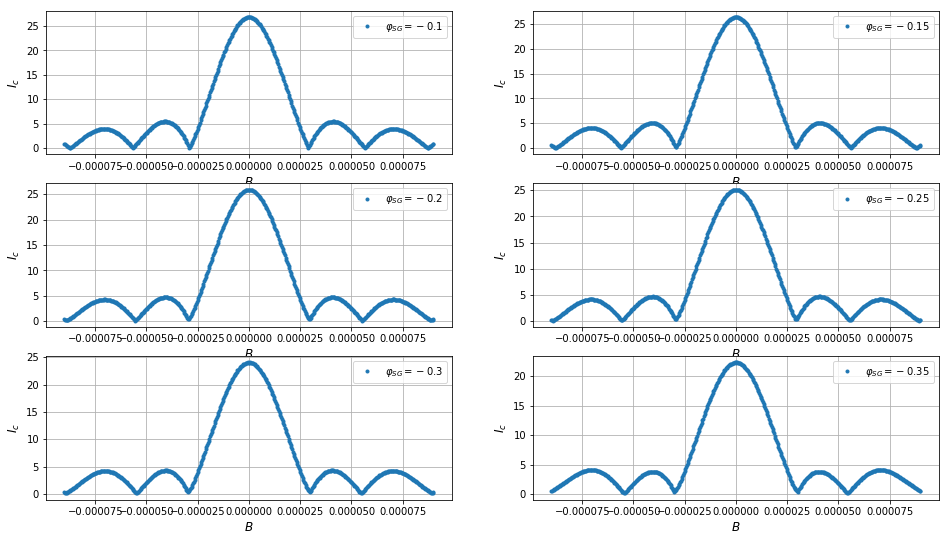

In [32]:
fig = plt.figure(figsize=(16, 9))
for i, label in enumerate(('a', 'b', 'c', 'd', 'e', 'f',)):
    offset = 0
    n = 321 + i
    ax = fig.add_subplot(n)
    files = get_dirs_list(directory)[2:]
    current_values = readValues(files[i + offset ][1])
    ax.plot(mag_field, current_values, linestyle='None',
             marker='.', label=r'$\varphi_{{SG}} = {0}$'.format(files[i + offset][0]))
    ax.grid()
    ax.legend(loc=1)
    ax.set_xlabel(r'$B$', fontsize=12)
    ax.set_ylabel(r'$I_c$', fontsize=12)
    ax.ticklabel_format(style='sci')

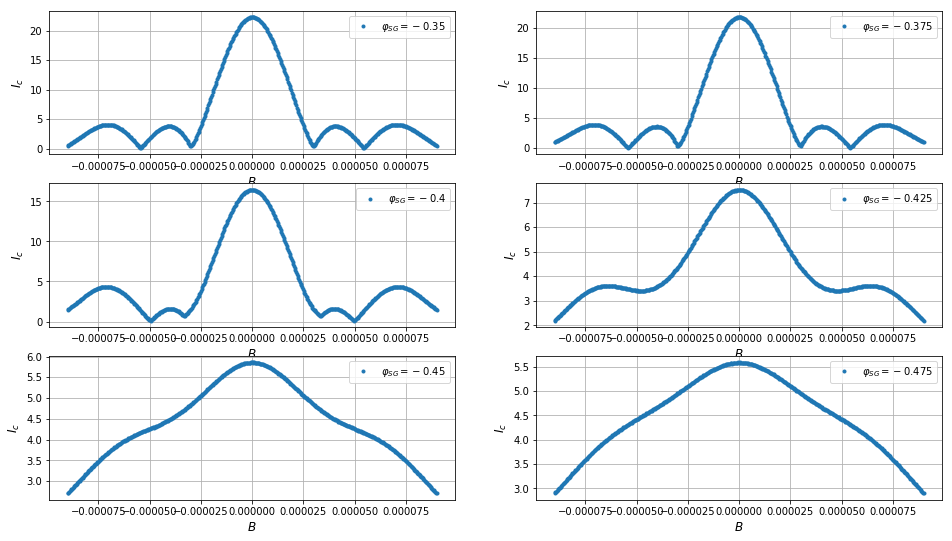

In [34]:
fig = plt.figure(figsize=(16, 9))
for i, label in enumerate(('a', 'b', 'c', 'd', 'e', 'f',)):
    offset = 5
    n = 321 + i
    ax = fig.add_subplot(n)
    files = get_dirs_list(directory)[2:]
    current_values = readValues(files[i + offset ][1])
    ax.plot(mag_field, current_values, linestyle='None',
             marker='.', label=r'$\varphi_{{SG}} = {0}$'.format(files[i + offset][0]))
    ax.grid()
    ax.legend(loc=1)
    ax.set_xlabel(r'$B$', fontsize=12)
    ax.set_ylabel(r'$I_c$', fontsize=12)
    ax.ticklabel_format(style='sci')

#### plots for experiment 3, long channel

In [24]:
directory = '/home/nefta/thesis/results/wg3_1_small/supercurrent/new/'

In [25]:
maxB = 9e-05
mag_field = np.linspace(-maxB, maxB, 500)

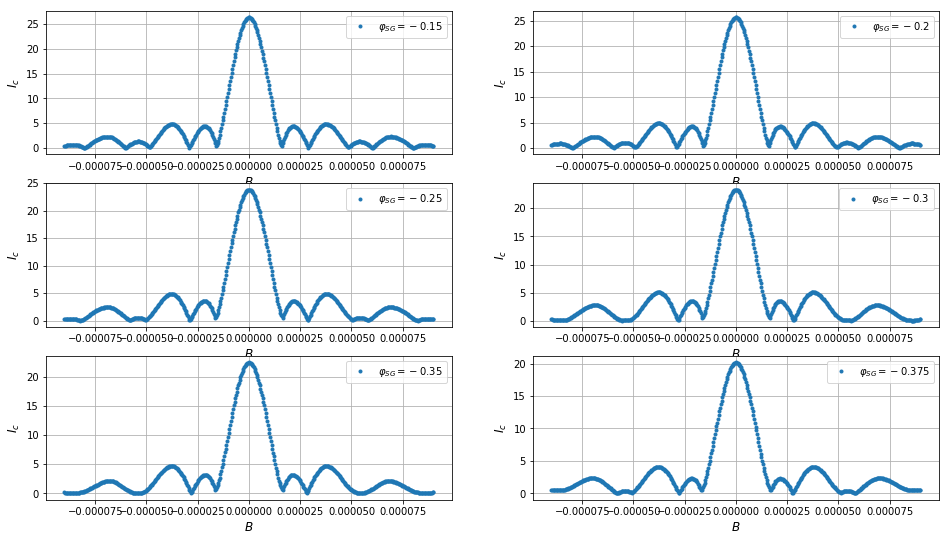

In [26]:
fig = plt.figure(figsize=(16, 9))
for i, label in enumerate(('a', 'b', 'c', 'd', 'e', 'f',)):
    offset = 0
    n = 321 + i
    ax = fig.add_subplot(n)
    files = get_dirs_list(directory)[1:]
    current_values = readValues(files[i + offset ][1])
    ax.plot(mag_field, current_values, linestyle='None',
             marker='.', label=r'$\varphi_{{SG}} = {0}$'.format(files[i + offset][0]))
    ax.grid()
    ax.legend(loc=1)
    ax.set_xlabel(r'$B$', fontsize=12)
    ax.set_ylabel(r'$I_c$', fontsize=12)
    ax.ticklabel_format(style='sci')


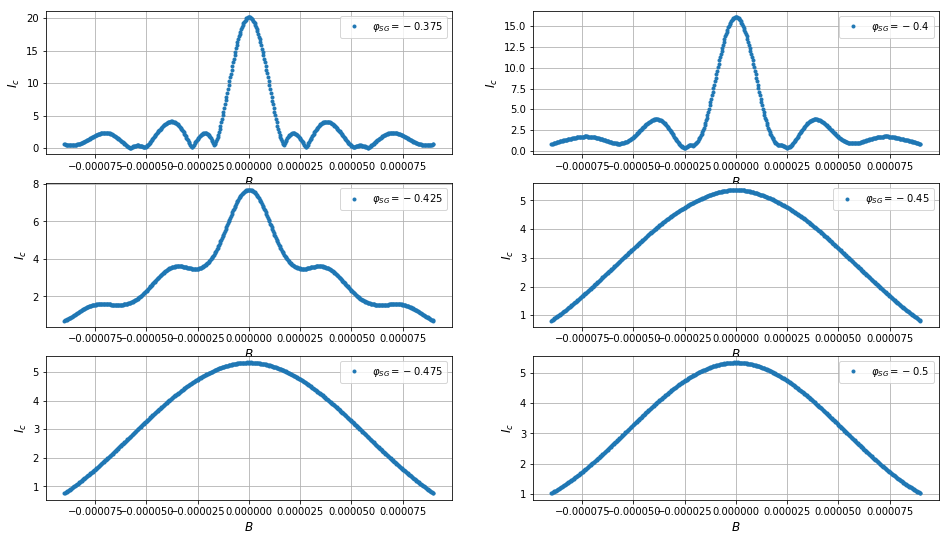

In [28]:
fig = plt.figure(figsize=(16, 9))
for i, label in enumerate(('a', 'b', 'c', 'd', 'e', 'f',)):
    offset = 6
    n = 321 + i
    ax = fig.add_subplot(n)
    files = get_dirs_list(directory)
    current_values = readValues(files[i + offset ][1])
    ax.plot(mag_field, current_values, linestyle='None',
             marker='.', label=r'$\varphi_{{SG}} = {0}$'.format(files[i + offset][0]))
    ax.grid()
    ax.legend(loc=1)
    ax.set_xlabel(r'$B$', fontsize=12)
    ax.set_ylabel(r'$I_c$', fontsize=12)
    ax.ticklabel_format(style='sci')


In [5]:
directory = '/home/nefta/thesis/results/long328/supercurrent/new/'

In [17]:
vsg_values = [-0.05, -0.1, -0.15, -0.2, -0.25, -0.3, 
              -0.4, -0.5, -0.6, 
              -0.625, 
              -0.65, 
              -0.675,
              -0.7, -0.725, -0.75, -0.8]

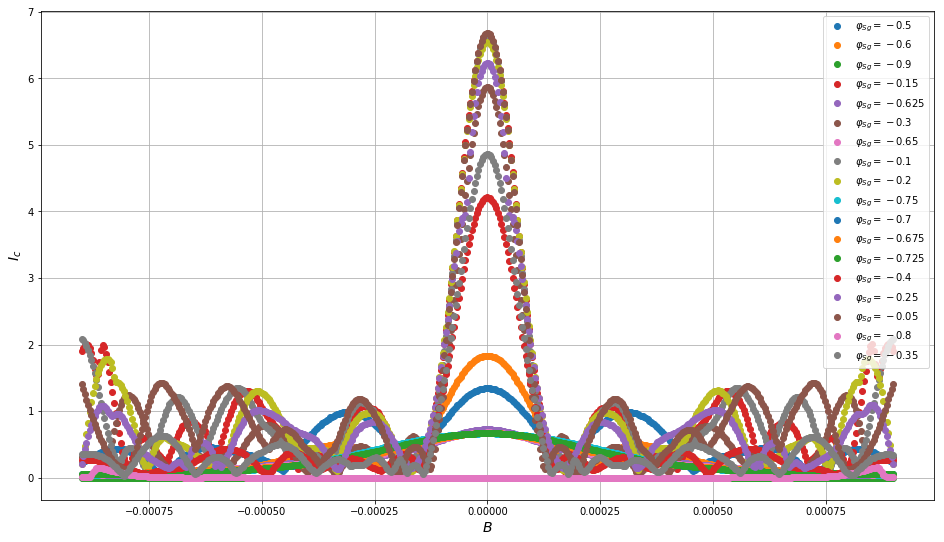

In [20]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel(r'$B$', fontsize=14)
ax.set_ylabel(r'$I_c$', fontsize=14)
maxB = 0.0009
mag_field = np.linspace(-maxB, maxB, 500)
for vsg, datafile in get_dirs(directory):
    values = readValues(datafile)
    ax.plot(mag_field, values, linestyle='None',
             marker='o', label=r'$\varphi_{{Sg}} = {}$'.format(vsg))
ax.ticklabel_format(style='sci')
ax.legend()
ax.grid()
#fig.savefig('plots/')

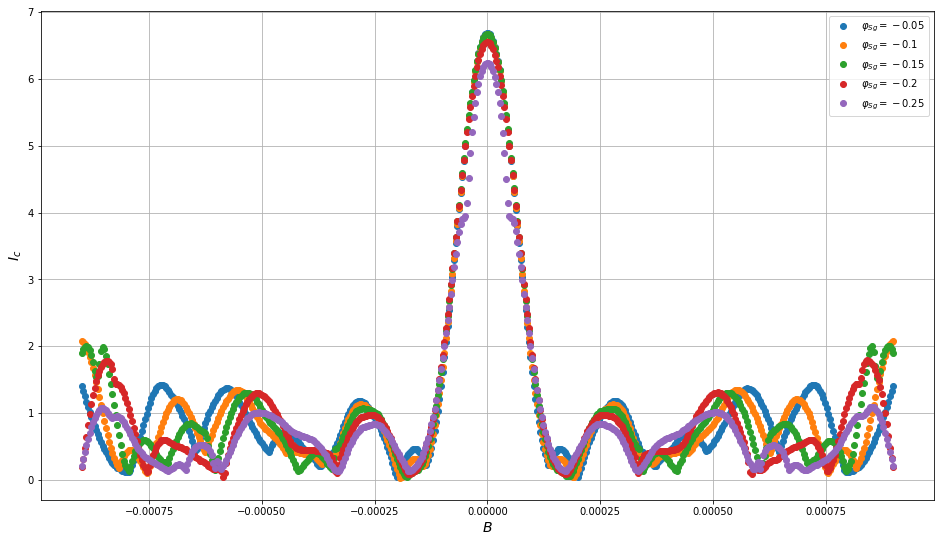

In [17]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel(r'$B$', fontsize=14)
ax.set_ylabel(r'$I_c$', fontsize=14)
maxB = 0.0009
mag_field = np.linspace(-maxB, maxB, 500)
for datafile, vsg in list(zip(datafiles, vsg_values))[:5]:
    values = readValues(datafile + 'data.csv')
    ax.plot(mag_field, values, linestyle='None',
             marker='o', label=r'$\varphi_{{Sg}} = {}$'.format(vsg))
ax.ticklabel_format(style='sci')
ax.legend()
ax.grid()
#fig.savefig('plots/')

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))


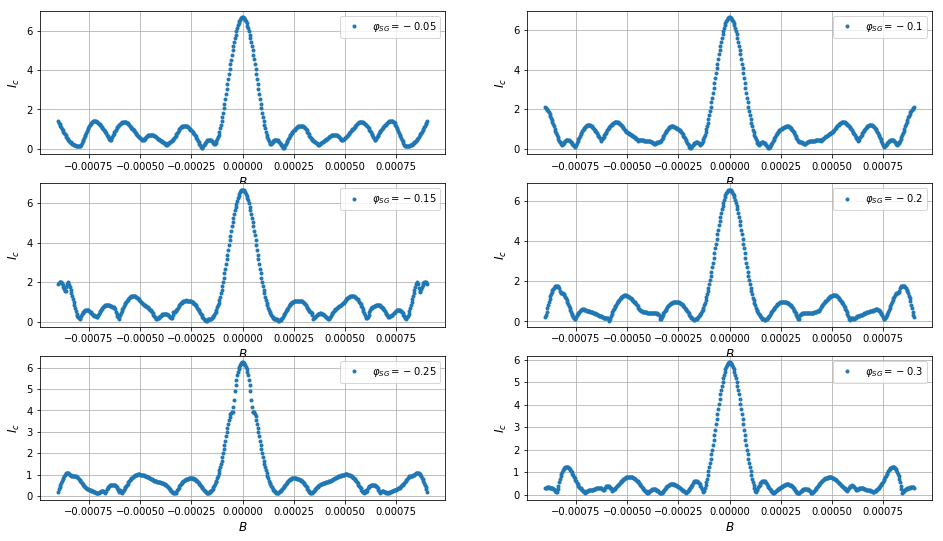

In [27]:
fig = plt.figure(figsize=(16, 9))
for i, label in enumerate(('a', 'b', 'c', 'd', 'e', 'f',)):
    n = 321 + i
    ax = fig.add_subplot(n)
    current_values = readValues(datafiles[i] + 'data.csv')
    ax.plot(mag_field, current_values, linestyle='None',
             marker='.', label=r'$\varphi_{{SG}} = {0}$'.format(vsg_values[i]))
    ax.grid()
    ax.legend(loc=1)
    ax.set_xlabel(r'$B$', fontsize=12)
    ax.set_ylabel(r'$I_c$', fontsize=12)
    ax.ticklabel_format(style='sci')


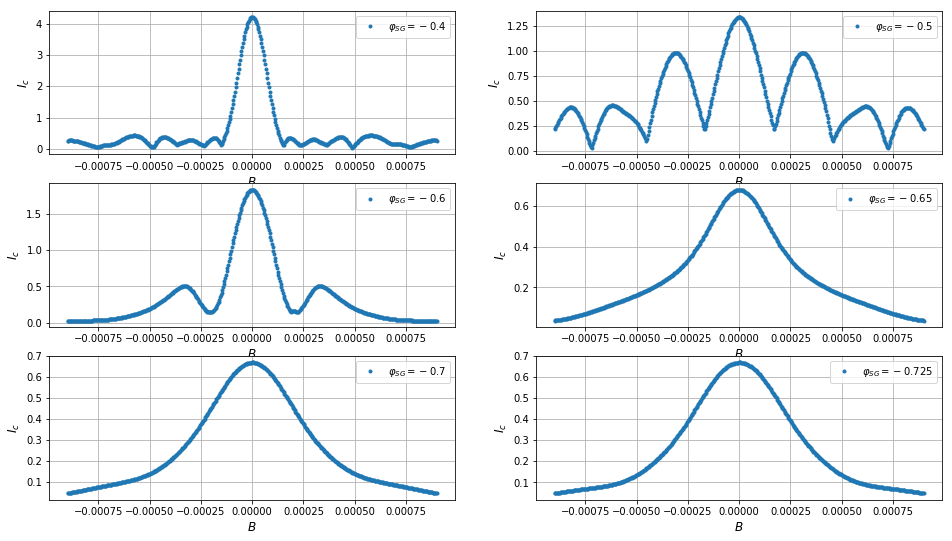

In [32]:
fig = plt.figure(figsize=(16, 9))
for i, label in enumerate(('a', 'b', 'c', 'd', 'e', 'f',)):
    n = 321 + i
    ax = fig.add_subplot(n)
    current_values = readValues(datafiles[6 + i] + 'data.csv')
    ax.plot(mag_field, current_values, linestyle='None',
             marker='.', label=r'$\varphi_{{SG}} = {0}$'.format(vsg_values[6 + i]))
    ax.grid()
    ax.legend(loc=1)
    ax.set_xlabel(r'$B$', fontsize=12)
    ax.set_ylabel(r'$I_c$', fontsize=12)
    ax.ticklabel_format(style='sci')

### Half Barrier Lower Part

In [83]:
hb_lower_files = [
    '/users/tkm/kanilmaz/thesis/results/hb_lower/supercurrent/decay20/vsg=-0.1-20171011-10:08:10/',
'/users/tkm/kanilmaz/thesis/results/hb_lower/supercurrent/decay20/vsg=-0.2-20171011-10:21:52/',
'/users/tkm/kanilmaz/thesis/results/hb_lower/supercurrent/decay20/vsg=-0.3-20171011-10:35:39/',
'/users/tkm/kanilmaz/thesis/results/hb_lower/supercurrent/decay20/vsg=-0.4-20171011-10:42:34/',
'/users/tkm/kanilmaz/thesis/results/hb_lower/supercurrent/decay20/vsg=-0.5-20171011-10:49:25/',
'/users/tkm/kanilmaz/thesis/results/hb_lower/supercurrent/decay20/vsg=-0.6-20171011-10:56:34/'
]

hb_lower_vsg = np.round(np.linspace(-0.1, -0.6, 6), 2)

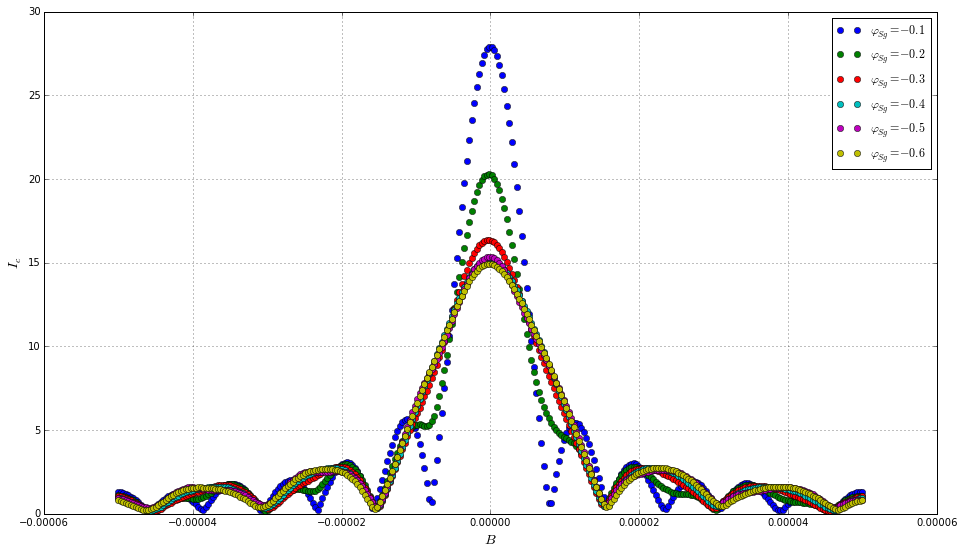

In [85]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel(r'$B$', fontsize=14)
ax.set_ylabel(r'$I_c$', fontsize=14)
maxB = 0.00005
mag_field = np.linspace(-maxB, maxB, 300)
for datafile, vsg in list(zip(hb_lower_files, hb_lower_vsg))[:]:
    values = readValues(datafile + 'data.csv')
    ax.plot(mag_field, values, linestyle='None',
             marker='o', label=r'$\varphi_{{Sg}} = {}$'.format(vsg))
ax.ticklabel_format(style='sci')
ax.legend()
ax.grid()
fig.savefig('plots/hb_lower_sc_all.png')

## Short Waveguide

In [77]:
short_wg_files = [
    '/users/tkm/kanilmaz/thesis/results/long82/supercurrent/maxB0002/vsg=-0.1-20171011-11:37:47/',
    '/users/tkm/kanilmaz/thesis/results/long82/supercurrent/maxB0002/vsg=-0.2-20171011-11:38:16/',
    '/users/tkm/kanilmaz/thesis/results/long82/supercurrent/maxB0002/vsg=-0.3-20171011-11:38:46/',
    '/users/tkm/kanilmaz/thesis/results/long82/supercurrent/maxB0002/vsg=-0.4-20171011-11:39:00/',
    '/users/tkm/kanilmaz/thesis/results/long82/supercurrent/maxB0002/vsg=-0.5-20171011-11:39:14/',
    '/users/tkm/kanilmaz/thesis/results/long82/supercurrent/maxB0002/vsg=-0.6-20171011-11:39:28/',
    '/users/tkm/kanilmaz/thesis/results/long82/supercurrent/maxB0002/vsg=-0.7-20171011-11:39:43/',
    '/users/tkm/kanilmaz/thesis/results/long82/supercurrent/maxB0002/vsg=-0.8-20171011-11:39:58/',
    '/users/tkm/kanilmaz/thesis/results/long82/supercurrent/maxB0002/vsg=-0.9-20171011-11:40:12/'
]

short_wg_vsg = np.round(np.linspace(-0.1, -0.9, 9), 2)

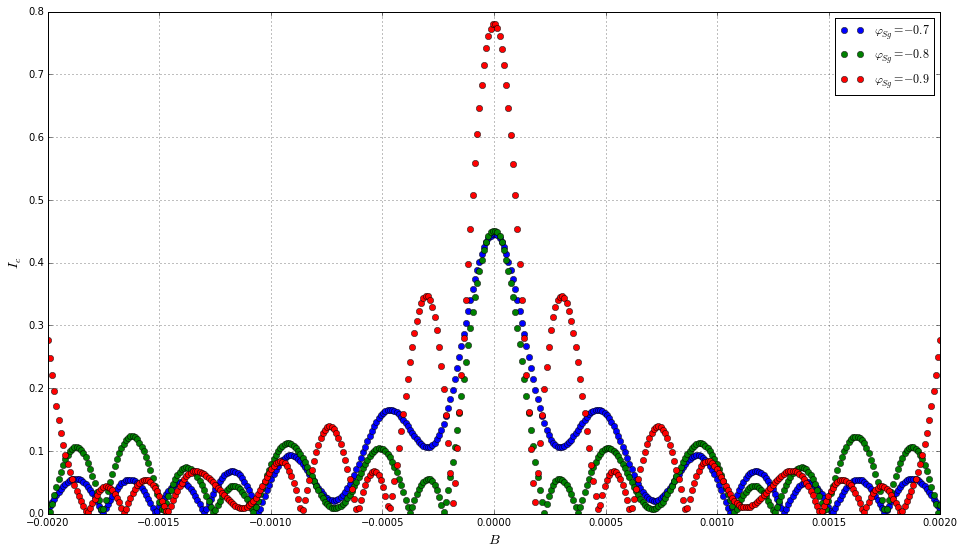

In [86]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel(r'$B$', fontsize=14)
ax.set_ylabel(r'$I_c$', fontsize=14)
maxB = 0.002
mag_field = np.linspace(-maxB, maxB, 400)
for datafile, vsg in list(zip(short_wg_files, short_wg_vsg))[6:]:
    values = readValues(datafile + 'data.csv')
    ax.plot(mag_field, values, linestyle='None',
             marker='o', label=r'$\varphi_{{Sg}} = {}$'.format(vsg))
ax.ticklabel_format(style='sci')
ax.legend()
ax.grid()
fig.savefig('plots/short_waveguide_sc_3.png')

### Long Waveguide

In [59]:
wg_files = [
    '/users/tkm/kanilmaz/thesis/results/long328/supercurrent/vsg=-0.1-20171011-12:27:14/',
    '/users/tkm/kanilmaz/thesis/results/long328/supercurrent/vsg=-0.2-20171011-12:27:26/',
    '/users/tkm/kanilmaz/thesis/results/long328/supercurrent/vsg=-0.3-20171011-12:27:38/',
    '/users/tkm/kanilmaz/thesis/results/long328/supercurrent/vsg=-0.4-20171011-12:27:50/',
    '/users/tkm/kanilmaz/thesis/results/long328/supercurrent/vsg=-0.5-20171011-12:28:02/',
    '/users/tkm/kanilmaz/thesis/results/long328/supercurrent/vsg=-0.6-20171011-12:28:14/',
    '/users/tkm/kanilmaz/thesis/results/long328/supercurrent/vsg=-0.7-20171011-12:28:26/',
    '/users/tkm/kanilmaz/thesis/results/long328/supercurrent/vsg=-0.8-20171011-12:28:38/',
    '/users/tkm/kanilmaz/thesis/results/long328/supercurrent/vsg=-0.9-20171011-12:28:50/'
]


In [60]:
wg_vsg = np.round(np.linspace(-0.1, -0.9, 9), 2)

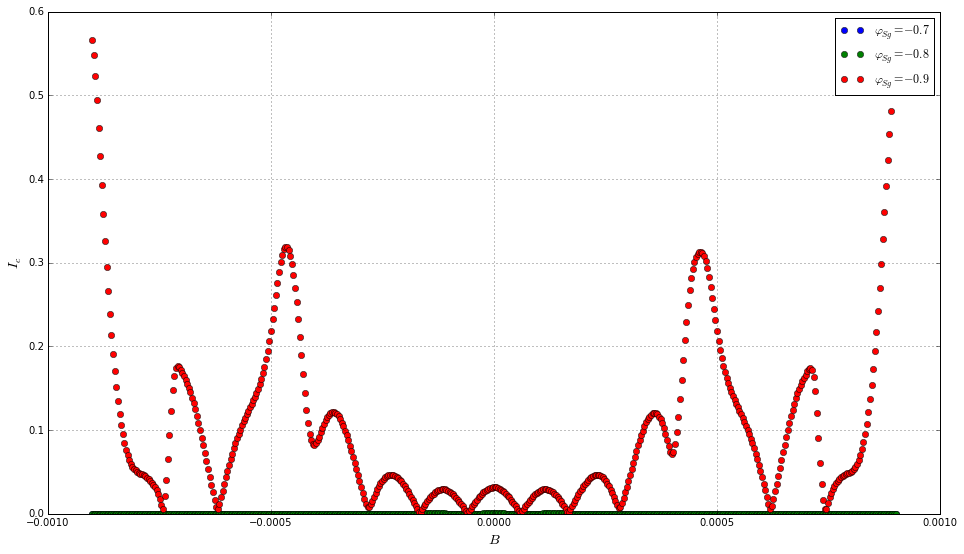

In [75]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel(r'$B$', fontsize=14)
ax.set_ylabel(r'$I_c$', fontsize=14)
maxB = 0.0009
mag_field = np.linspace(-maxB, maxB, 500)
for datafile, vsg in list(zip(wg_files, wg_vsg))[6:]:
    values = readValues(datafile + 'data.csv')
    ax.plot(mag_field, values, linestyle='None',
             marker='o', label=r'$\varphi_{{Sg}} = {}$'.format(vsg))
ax.ticklabel_format(style='sci')
ax.legend()
ax.grid()
fig.savefig('plots/long_waveguide_3.png')

# Conductance Plots

### Long Waveguide

In [27]:
wg_files = ['/users/tkm/kanilmaz/thesis/results/long328/conductance/at5a04/vbg=0.1-20171010-12:09:02/',
           '/users/tkm/kanilmaz/thesis/results/long328/conductance/at5a04/vbg=0.2-20171010-12:09:05/',
           '/users/tkm/kanilmaz/thesis/results/long328/conductance/at5a04/vbg=0.3-20171010-12:09:07/',
           '/users/tkm/kanilmaz/thesis/results/long328/conductance/at5a04/vbg=0.4-20171010-12:09:10/', 
            '/users/tkm/kanilmaz/thesis/results/long328/conductance/at5a04/vbg=0.5-20171010-12:09:12/',
           '/users/tkm/kanilmaz/thesis/results/long328/conductance/at5a04/vbg=0.6-20171010-12:09:15/',
           '/users/tkm/kanilmaz/thesis/results/long328/conductance/at5a04/vbg=0.7-20171010-12:09:18/',
           '/users/tkm/kanilmaz/thesis/results/long328/conductance/at5a04/vbg=0.8-20171010-12:09:20/',
            '/users/tkm/kanilmaz/thesis/results/long328/conductance/at5a04/vbg=0.9-20171010-12:09:23/']

In [28]:
wg_vbg = np.round(np.linspace(0.1, 0.9, 9), 2)

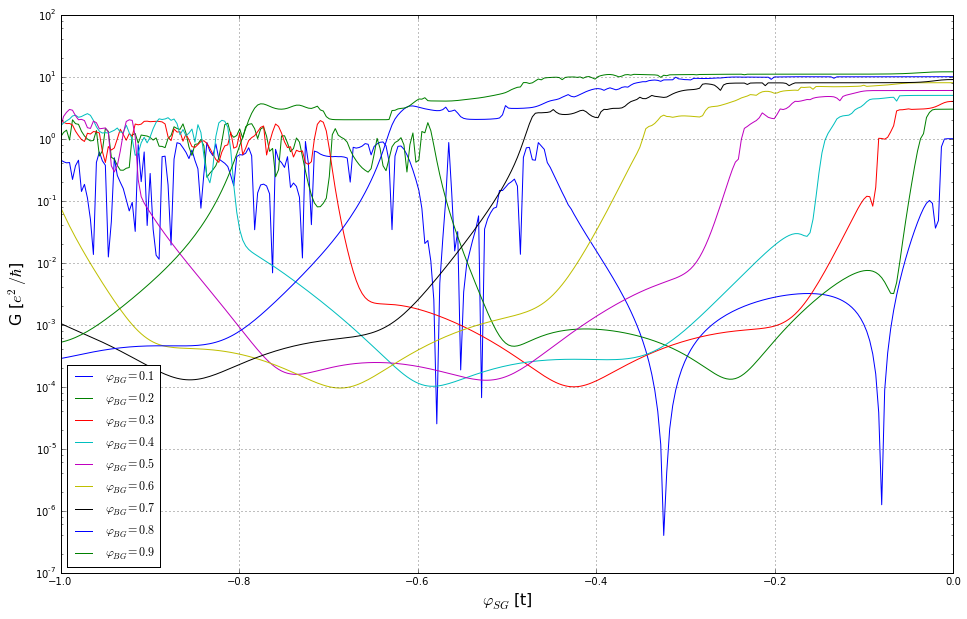

In [33]:
splitgate = np.linspace(-1.0, 0.0, 300)
fig, ax = plt.subplots(figsize=(16, 10))

for datafile, vbg in list(zip(wg_files, wg_vbg)):
    values = readValues(datafile + 'data.csv')
    ax.plot(splitgate, values, label=r'$\varphi_{{BG}} = {}$'.format(vbg))

ax.set_yscale("log"),
#ax.set_xlim([-0.8, 0.0])
ax.set_xlim(splitgate[0], splitgate[-1])
ax.set_xlabel(r'$\varphi_{SG}$ [t]', fontsize=16)
ax.set_ylabel(r'G [$e^2/ \hbar$]', fontsize=16)
ax.grid()
ax.legend(loc=3)
#fig.savefig('long_waveguide_conductance_log_3.png')

### HB Lower part

In [1]:
hb_low_files = ['/users/tkm/kanilmaz/thesis/results/hb_lower/conductance/vbg=0.1-20171011-09:55:29/',
            '/users/tkm/kanilmaz/thesis/results/hb_lower/conductance/vbg=0.2-20171011-10:01:25/',
             '/users/tkm/kanilmaz/thesis/results/hb_lower/conductance/vbg=0.3-20171011-10:07:32/',
            '/users/tkm/kanilmaz/thesis/results/hb_lower/conductance/vbg=0.4-20171011-10:13:42/',
            '/users/tkm/kanilmaz/thesis/results/hb_lower/conductance/vbg=0.5-20171011-10:19:56/',
            '/users/tkm/kanilmaz/thesis/results/hb_lower/conductance/vbg=0.6-20171011-10:26:23/',
            ]

hb_low_vbg = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]


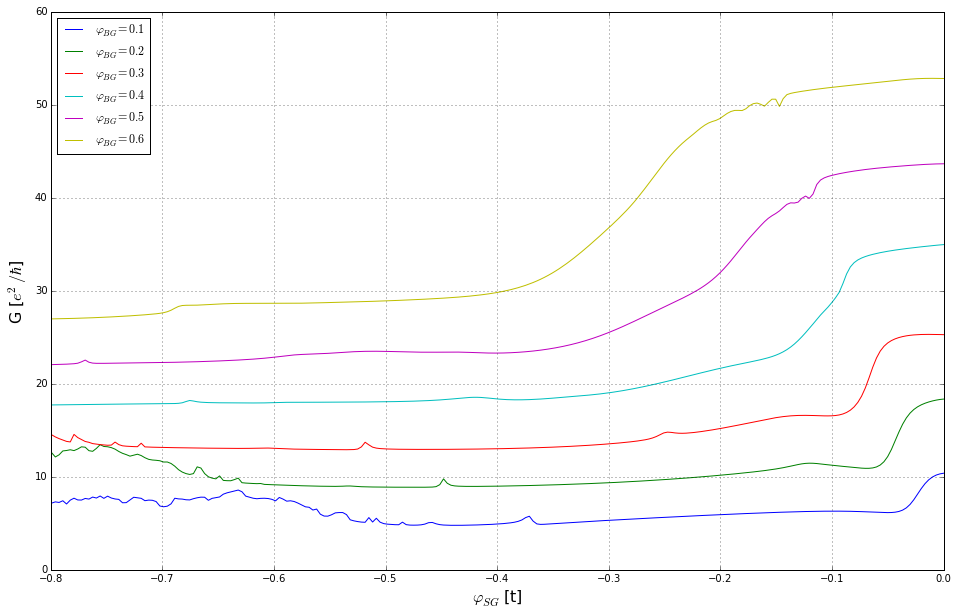

In [8]:
splitgate = np.linspace(-1.0, 0.0, 300)
fig, ax = plt.subplots(figsize=(16, 10))

for datafile, vbg in list(zip(hb_low_files, hb_low_vbg)):
    values = readValues(datafile + 'data.csv')
    ax.plot(splitgate[60:], values[60:], label=r'$\varphi_{{BG}} = {}$'.format(vbg))

#ax.set_yscale("log"),
ax.set_xlim([-0.8, 0.0])
#ax.set_xlim(splitgate[0], splitgate[-1])
ax.set_xlabel(r'$\varphi_{SG}$ [t]', fontsize=16)
ax.set_ylabel(r'G [$e^2/ \hbar$]', fontsize=16)
ax.grid()
ax.legend(loc=2)
#fig.savefig('hb_low_conductance.png')

### Short Waveguide

In [9]:
datafiles = ['/users/tkm/kanilmaz/thesis/results/long82/conductance/vbg=0.1-20171009-19:05:36/',
            '/users/tkm/kanilmaz/thesis/results/long82/conductance/vbg=0.2-20171009-19:07:44/',
            '/users/tkm/kanilmaz/thesis/results/long82/conductance/vbg=0.3-20171009-19:09:53/',
            '/users/tkm/kanilmaz/thesis/results/long82/conductance/vbg=0.4-20171009-19:12:02/',
            '/users/tkm/kanilmaz/thesis/results/long82/conductance/vbg=0.5-20171009-19:14:17/',
            '/users/tkm/kanilmaz/thesis/results/long82/conductance/vbg=0.6-20171009-19:16:34/',
             '/users/tkm/kanilmaz/thesis/results/long82/conductance/vbg=0.7-20171009-19:19:04/',
             '/users/tkm/kanilmaz/thesis/results/long82/conductance/vbg=0.8-20171009-19:21:33/',
             '/users/tkm/kanilmaz/thesis/results/long82/conductance/vbg=0.9-20171009-19:24:16/'
            ]

In [10]:
vbg_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

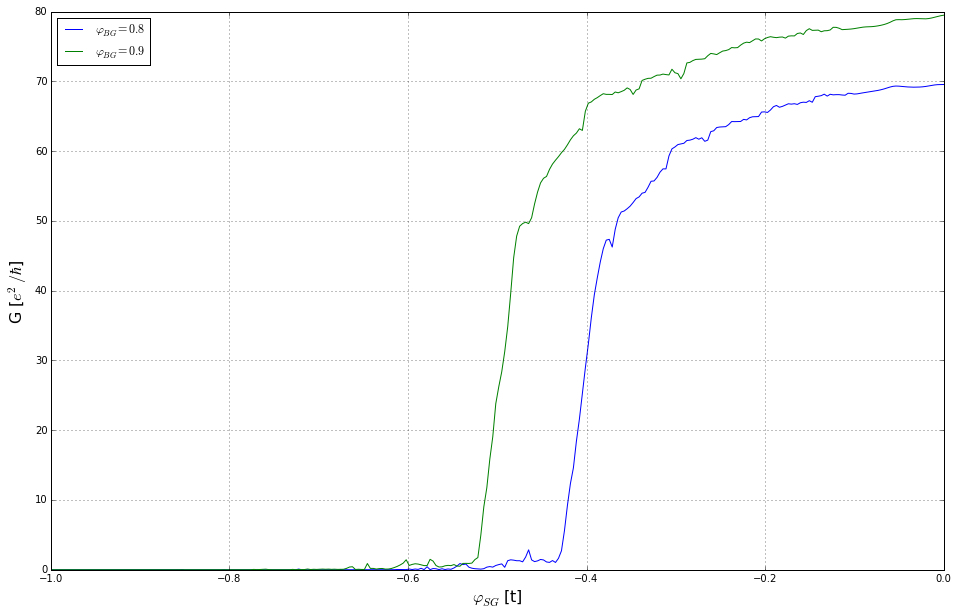

In [26]:
splitgate = np.linspace(-1.0, 0.0, 300)
fig, ax = plt.subplots(figsize=(16, 10))

for datafile, vbg in list(zip(datafiles, vbg_values))[7:]:
    values = readValues(datafile + 'data.csv')
    ax.plot(splitgate, values, label=r'$\varphi_{{BG}} = {}$'.format(vbg))

#ax.set_yscale("log"),

ax.set_xlim(splitgate[0], splitgate[-1])
ax.set_xlabel(r'$\varphi_{SG}$ [t]', fontsize=16)
ax.set_ylabel(r'G [$e^2/ \hbar$]', fontsize=16)
ax.grid()
ax.legend(loc=2)
fig.savefig('short_waveguide_conductance_3.png')